# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time- series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity 
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [35]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [36]:
path = r'C:\Users\JocGa\Achievement 6'

In [37]:
df_merged = pd.read_csv(os.path.join(path, '02 Data', 'Merged_Happiness_Report_2015_2019.csv'), index_col=False)

In [38]:
df_merged.head()

,Unnamed: 0,Country,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity
0,0,Afghanistan,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
1,1,Albania,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
2,2,Algeria,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
3,3,Angola,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
4,4,Argentina,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451


In [39]:
df_merged.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption', 'Generosity'],
      dtype='object')

In [40]:
#drop unname columns for df
df_merged = df_merged.drop(columns = ['Unnamed: 0'])

In [41]:
df_merged.head()

,Country,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity
0,Afghanistan,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
1,Albania,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
2,Algeria,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
3,Angola,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
4,Argentina,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451


In [42]:
df_merged.shape

(781, 10)

In [43]:
df_merged.columns

Index(['Country', 'Year', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption', 'Generosity'],
      dtype='object')

In [44]:
df_merged.dtypes

Country             object
Year                 int64
Happiness_Rank       int64
Happiness_Score    float64
GDP_per_Capita     float64
Social_Support     float64
Life_Expectancy    float64
Freedom            float64
Corruption         float64
Generosity         float64
dtype: object

In [45]:
subset_df = df_merged[['Year','Happiness_Rank']]

In [46]:
subset_df.head()

,Year,Happiness_Rank
0,2015,153
1,2015,95
2,2015,68
3,2015,137
4,2015,30


In [47]:
# Set the "Date" column as the index

from datetime import datetime

subset_df['Years'] = pd.to_datetime(subset_df['Year'], format='%Y') # Create a datetime column from "Date.""
subset_df = subset_df.set_index('Years') # Set the datetime as the index of the dataframe.
subset_df.drop(['Year'], axis=1, inplace=True) # Drop the "Date" column.
subset_df.head()

,Happiness_Rank
Years,
2015-01-01,153
2015-01-01,95
2015-01-01,68
2015-01-01,137
2015-01-01,30


In [48]:
subset_df = subset_df.dropna()

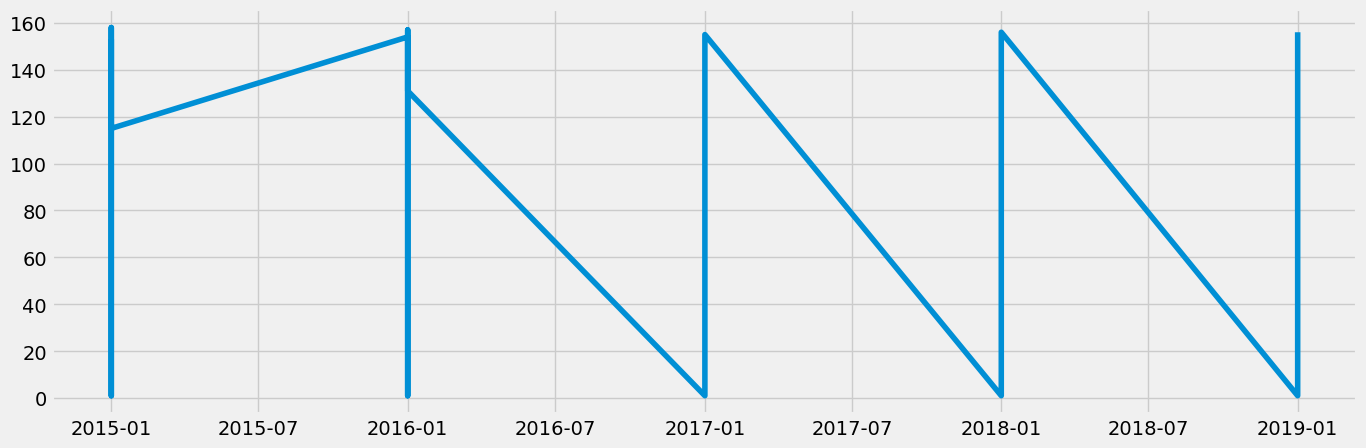

In [49]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(subset_df)

#observation, trend line appears to have an upward movement and downward 

# 2 Subsetting, wrangling, and cleaning time-series data

In [50]:
# Group the data by 'Year' and calculate mean GDP per capita for each year
grouped_df = subset_df.groupby('Years')['Happiness_Rank'].mean()

In [51]:
# Reset the index of the DataFrame
grouped_df = grouped_df.reset_index()

In [52]:
grouped_df.dtypes

Years             datetime64[ns]
Happiness_Rank           float64
dtype: object

In [53]:
grouped_df.head()

,Years,Happiness_Rank
0,2015-01-01,79.493671
1,2016-01-01,78.980892
2,2017-01-01,78.000000
3,2018-01-01,78.877419
4,2019-01-01,78.500000


In [54]:
# Set the "Date" column as the index

from datetime import datetime

grouped_df['years'] = pd.to_datetime(grouped_df['Years']) # Create a datetime column from "Date.""
grouped_df = grouped_df.set_index('years') # Set the datetime as the index of the dataframe.
grouped_df.drop(['Years'], axis=1, inplace=True) # Drop the "Date" column.
grouped_df.head()

,Happiness_Rank
years,
2015-01-01,79.493671
2016-01-01,78.980892
2017-01-01,78.000000
2018-01-01,78.877419
2019-01-01,78.500000


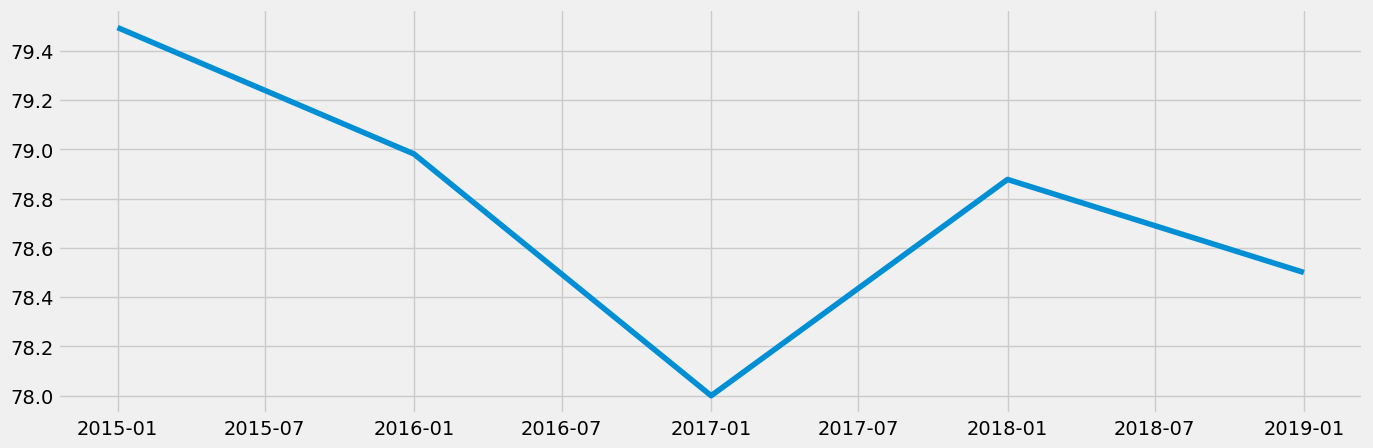

In [55]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(grouped_df)

In [56]:
# Check for missing values (you shouldn't have any)

grouped_df.isnull().sum() 

Happiness_Rank    0
dtype: int64

In [57]:
# Check for duplicates

dups = grouped_df.duplicated()
dups.sum()

# No dups!

0

# 3 Time-Series analysis: decomposition

In [58]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(grouped_df, model='additive')

In [59]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

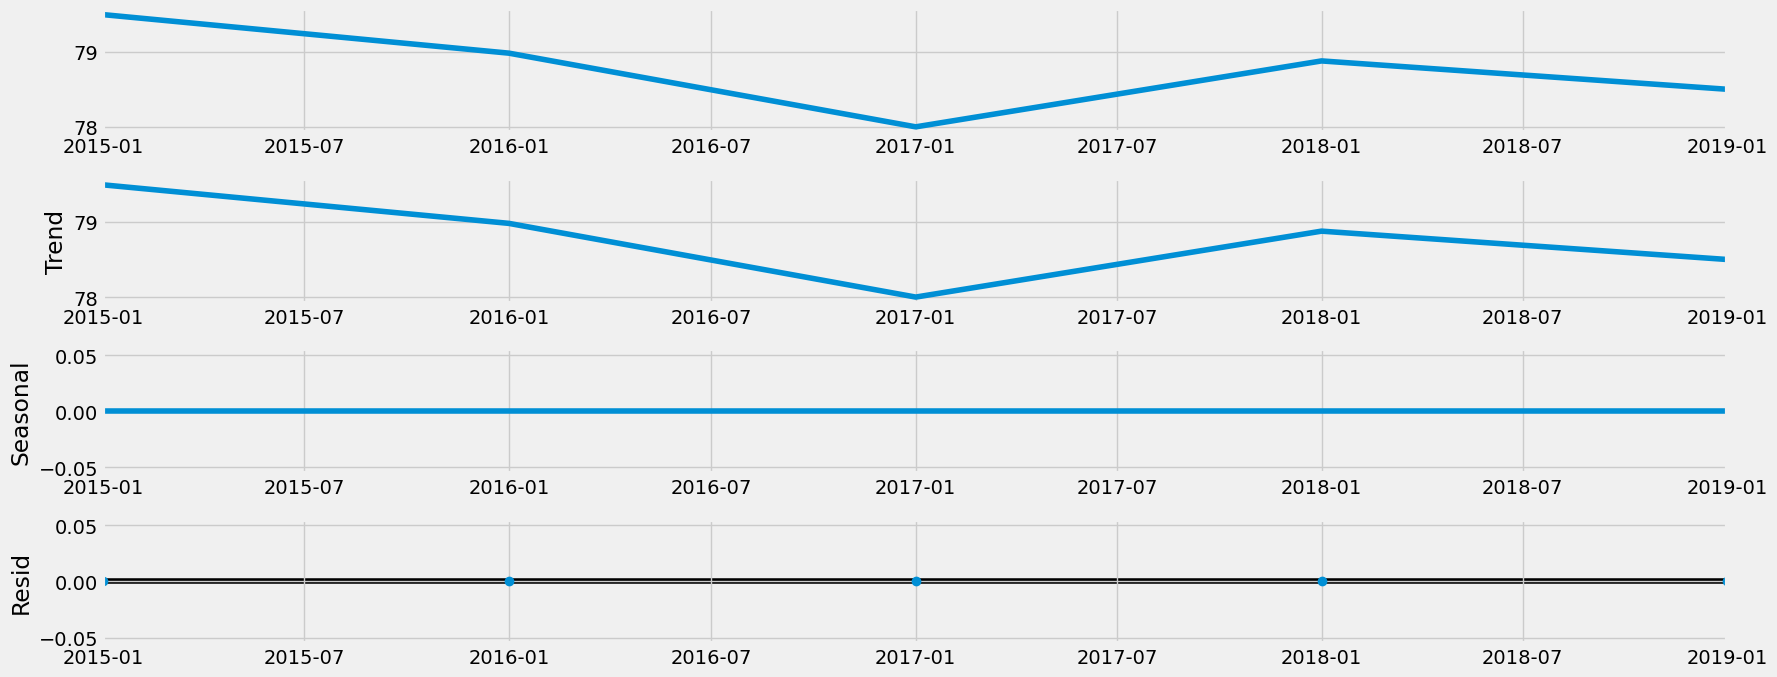

In [60]:
# Plot the separate components

decomposition.plot()
plt.show()

#observation, original line has a upward trend movement; underlying thrend shows unsmoothed data; no seasonal; 

# 4. Testing for stationarity

In [61]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

In [62]:
dickey_fuller(grouped_df['Happiness_Rank'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.107306
p-value                        0.241587
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


#observation, the pvalue is not less than 0.05, so its not significant; Test statistic -2.33>-7.355 we cant not reject null, so there is a unit root in my data, the data is non stationary. 

### Test for Autocorrelation

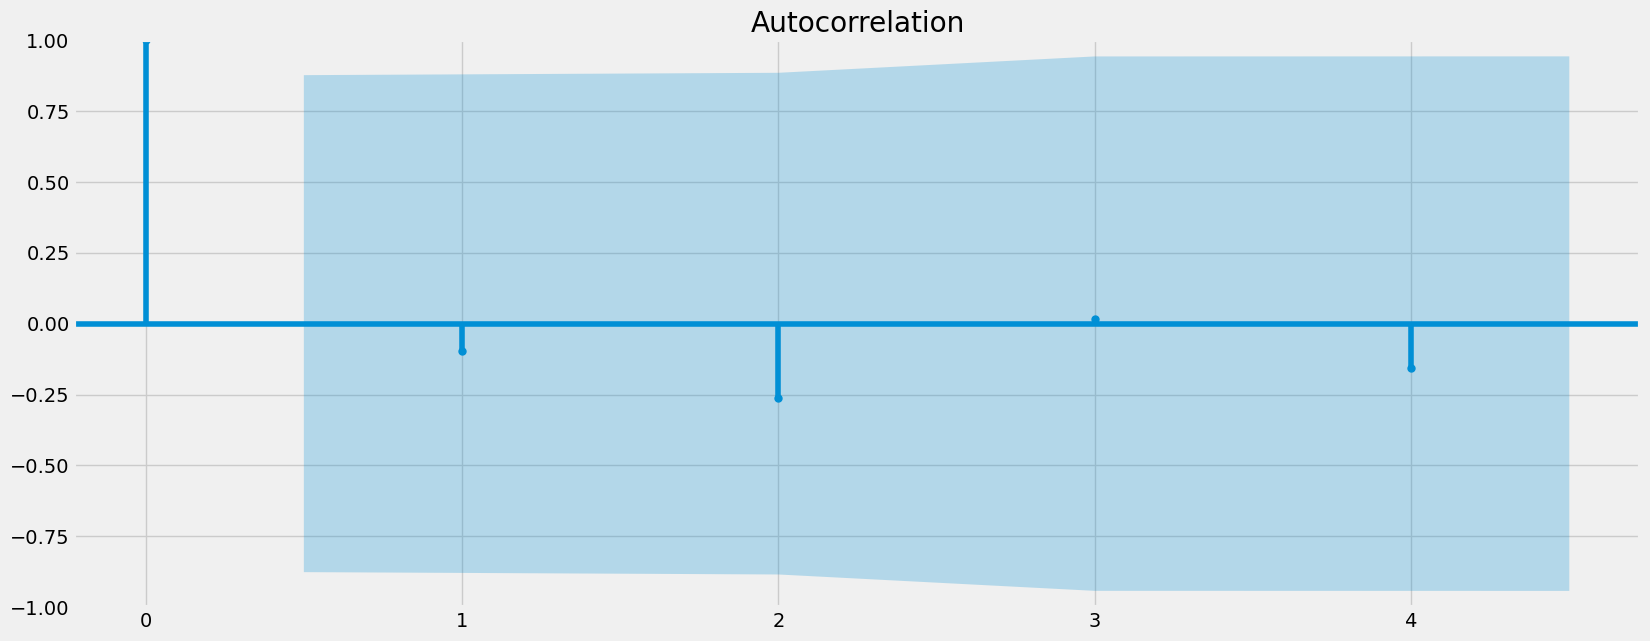

In [63]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(grouped_df)
plt.show()

# 5. Stationarizing the Federal Reserve Economic Data

In [64]:
data_diff2 = grouped_df - grouped_df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [65]:
data_diff2.dropna(inplace = True)

In [66]:
data_diff2.columns

Index(['Happiness_Rank'], dtype='object')

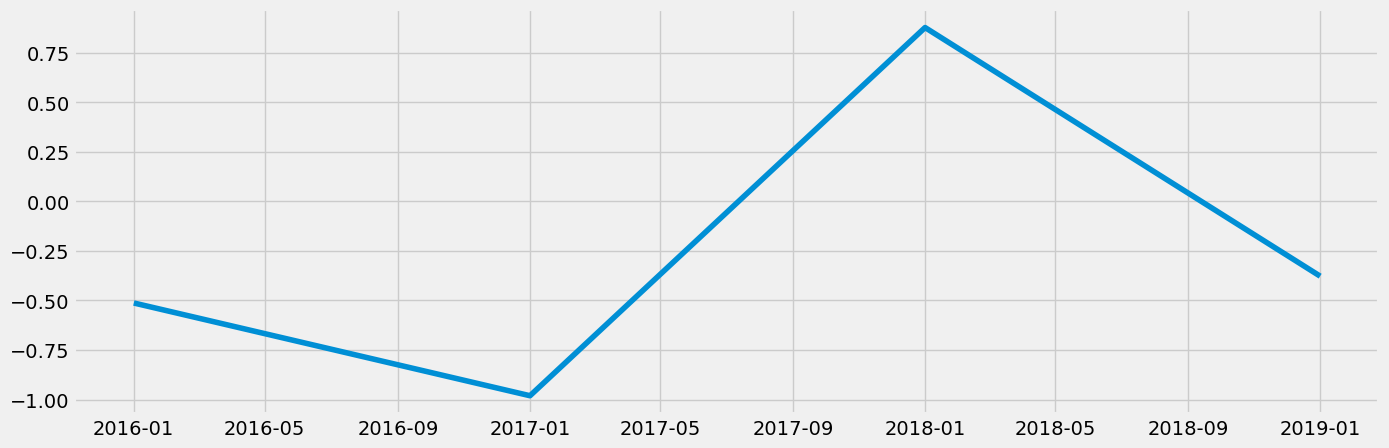

In [67]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [68]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.605173
p-value                         0.480994
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [69]:
data_diff3 = data_diff2 - grouped_df.shift(1)

In [70]:
data_diff3.dropna(inplace = True)

In [71]:
data_diff3.columns

Index(['Happiness_Rank'], dtype='object')

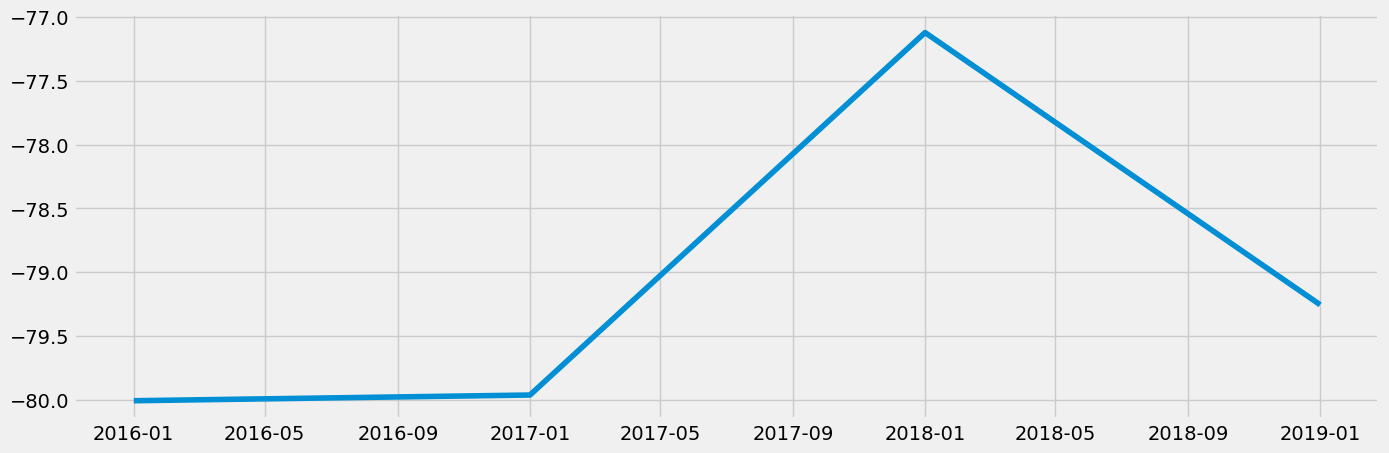

In [72]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff3)

In [73]:
dickey_fuller(data_diff3)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.434694
p-value                         0.565535
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64
